# Midwestern Canadian Shield forests

In [1]:
import io, requests

import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio as rst
from rasterio.plot import show,show_hist
from rasterio.mask import mask

import matplotlib as mpl
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
def getdf(link):
  req = requests.get(link).content
  return gpd.read_file(io.StringIO(req.decode('utf-8')))

# Forests

#### Terrestrial ecoregions data

In [3]:
terr_ecoregions_df = gpd.read_file("TerrestrialEcoregionsoftheWorld_WWF.geojson")

In [4]:
terr_ecoregions_df.shape

(14351, 22)

In [5]:
pd.options.display.max_columns = None
terr_ecoregions_df.head(3)

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
0,1,1,29.802942,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,,0,0,0,8174,NT1404,,,Neotropics,0.219475,0.002769,"POLYGON ((-112.30433 29.33480, -112.29035 29.3..."
1,2,2,11.977824,Northern Mesoamerican Pacific mangroves,NT,14,4,61404,119,1,,0,0,0,8174,NT1404,,,Neotropics,0.193289,0.001111,"POLYGON ((-112.19639 29.20719, -112.19669 29.2..."
2,3,3,77301.372760,Sinaloan dry forests,NT,2,28,60228,98,1,Southern Mexican Dry Forests,56,2,1,77362,NT0228,,,Neotropics,111.951414,6.879188,"POLYGON ((-108.40314 28.29783, -108.41069 28.3..."


#### North America/Nearctic forest regions

In [6]:
nearctic = terr_ecoregions_df[terr_ecoregions_df['REALM_1']=='Nearctic']
nearctic.shape

(3393, 22)

In [7]:
nearctic.head(4)

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
441,442,5651,10.361099,Low Arctic tundra,NA,11,14,51114,49,3,Canadian Low Arctic tundra,114,11,3,801765,NA1114,,,Nearctic,0.387735,0.001744,"POLYGON ((-93.85831 61.50200, -93.87036 61.505..."
442,443,6837,382.937451,British Columbia mainland coastal forests,NA,5,6,50506,71,1,Pacific temperate rainforests,72,5,1,137750,NA0506,,,Nearctic,1.238673,0.051954,"POLYGON ((-128.83858 53.71896, -128.84592 53.7..."
444,445,6839,7.892752,Eastern Canadian Shield taiga,NA,6,6,50606,36,3,Canadian boreal taiga,82,6,3,757250,NA0606,,,Nearctic,0.154699,0.001073,"POLYGON ((-56.51519 53.65995, -56.50477 53.663..."
447,448,6842,980.421882,British Columbia mainland coastal forests,NA,5,6,50506,71,1,Pacific temperate rainforests,72,5,1,137750,NA0506,,,Nearctic,2.402506,0.132440,"POLYGON ((-130.44283 53.63871, -130.45287 53.6..."


In [8]:
pd.options.display.max_rows = None
nearctic['ECO_NAME']. value_counts()

Middle Arctic tundra                                   516
Kalaallit Nunaat low arctic tundra                     401
Northern Pacific coastal forests                       273
Kalaallit Nunaat high arctic tundra                    169
Low Arctic tundra                                      154
High Arctic tundra                                     135
Sierra Madre Oriental pine-oak forests                 120
Beringia lowland tundra                                118
British Columbia mainland coastal forests              108
Sierra Madre Occidental pine-oak forests               106
Davis Highlands tundra                                  96
Arctic coastal tundra                                   93
Eastern Canadian Shield taiga                           88
Pacific Coastal Mountain icefields and tundra           76
Aleutian Islands tundra                                 67
Middle Atlantic coastal forests                         65
Puget lowland forests                                   

#### Small forest regions

In [10]:
nearctic[nearctic['ECO_NAME'].map(nearctic['ECO_NAME'].value_counts()) == 1].shape

(36, 22)

In [11]:
nearctic[nearctic['ECO_NAME'].map(nearctic['ECO_NAME'].value_counts()) == 1]

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
2076,2077,2248,50369.963763,Klamath-Siskiyou forests,NA,5,16,50516,76,1,Klamath-Siskiyou coniferous forests,73,5,1,50370,NA0516,,,Nearctic,15.829245,5.423855,"POLYGON ((-123.37013 43.72019, -123.37564 43.7..."
4877,4878,8308,52583.157909,East Central Texas forests,NA,4,5,50405,73,1,,0,0,0,52583,NA0405,,,Nearctic,20.440311,4.947728,"POLYGON ((-95.12090 33.47003, -95.13347 33.464..."
4893,4894,8387,61733.695524,Edwards Plateau savanna,NA,8,6,50806,91,1,,0,0,0,61734,NA0806,,,Nearctic,12.135616,5.794067,"POLYGON ((-97.43731 31.39838, -97.43943 31.400..."
4924,4925,4377,160646.465387,Brooks-British Range tundra,NA,11,8,51108,55,3,,0,0,0,160646,NA1108,,,Nearctic,87.437566,34.787761,"POLYGON ((-135.89933 68.54896, -135.90606 68.5..."
5398,5399,4761,209807.521373,Ogilvie-MacKenzie alpine tundra,NA,11,16,51116,38,3,,0,0,0,209808,NA1116,,,Nearctic,62.274215,38.804044,"POLYGON ((-136.24282 65.74128, -136.26505 65.7..."
5450,5451,4813,263805.614463,Muskwa-Slave Lake forests,NA,6,10,50610,65,3,Muskwa/Slave Lake Boreal Forests,81,6,3,263806,NA0610,,,Nearctic,69.770551,42.985018,"POLYGON ((-115.76493 61.45939, -115.77061 61.4..."
5601,5602,7377,248867.015489,Central tall grasslands,NA,8,5,50805,405,1,,0,0,0,248867,NA0805,,,Nearctic,32.037852,27.385380,"POLYGON ((-96.03223 46.08197, -96.03186 46.079..."
5950,5951,5252,62742.225977,Yukon Interior dry forests,NA,6,17,50617,65,2,,0,0,0,62742,NA0617,,,Nearctic,39.383198,10.516696,"POLYGON ((-135.07761 62.66053, -135.18541 62.7..."
6133,6134,5459,17275.283052,Copper Plateau taiga,NA,6,4,50604,61,3,,0,0,0,17275,NA0604,,,Nearctic,15.440090,2.974886,"POLYGON ((-142.18343 61.13247, -142.20423 61.1..."
6171,6172,5497,264234.178042,Northern Cordillera forests,NA,6,13,50613,63,2,Muskwa/Slave Lake Boreal Forests,81,6,3,264234,NA0613,,,Nearctic,76.370782,41.610923,"POLYGON ((-130.04703 61.86813, -130.04955 61.8..."


#### Midwestern Canadian Shield forests

In [12]:
midwest_shield= terr_ecoregions_df[terr_ecoregions_df['ECO_NAME']=='Midwestern Canadian Shield forests']
midwest_shield

,OBJECTID_1,OBJECTID,AREA,ECO_NAME,REALM,BIOME,ECO_NUM,ECO_ID,ECO_SYM,GBL_STAT,G200_REGIO,G200_NUM,G200_BIOME,G200_STAT,area_km2,eco_code,BIOME_1,GBL_STAT_1,REALM_1,Shape_Length,Shape_Area,geometry
6673,6674,6159,548394.256367,Midwestern Canadian Shield forests,NA,6,9,50609,64,2,,0,0,0,548394,NA0609,,,Nearctic,117.435567,77.059092,"POLYGON ((-106.00081 59.29515, -105.99882 59.2..."


In [13]:
midwest_shield_stats=midwest_shield[['ECO_ID','REALM_1','GBL_STAT','BIOME','area_km2']].transpose()
midwest_shield_stats

,6673
ECO_ID,50609
REALM_1,Nearctic
GBL_STAT,2
BIOME,6
area_km2,548394


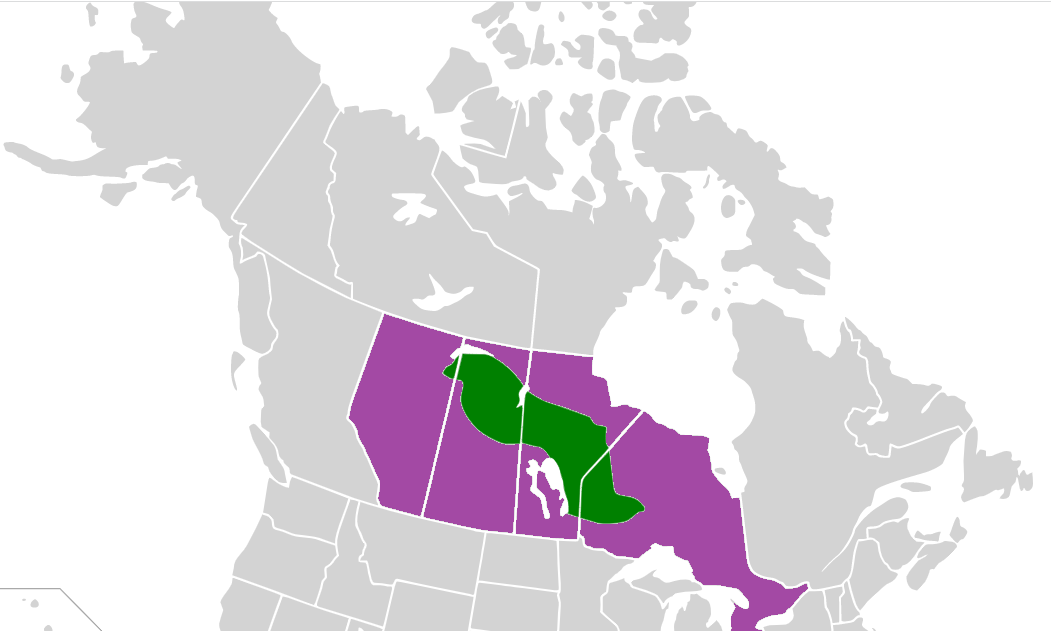

In [21]:
from IPython.display import Image
Image(filename='mwcf.png') 

Provinces : Alberta, Manitoba, Saskatchewan, Ontario

*Terrestrial ecoregions of North America : a conservation assessment. Taylor H Ricketts; et al. Washington, D.C. : Island Press, ©1999. xxiv, 485 p. : ill. (some col.), maps (some col.) ; 28 cm. (ISBN 9781559637220)*

#### Quick load

In [15]:
midwest_shield_shape=midwest_shield[['geometry']]

In [16]:
midwest_shield_shape.to_file("midwest_shield_shape.shp")

In [ ]:
shp = 'midwest_shield_shape.shp'
midwest_shield = gpd.read_file(shp)

# Ecological zones

In [17]:
eco_zone = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/GlobalEcologicalZone_GEZFAO2010.json'
eco_zone_df = getdf(eco_zone)

In [18]:
eco_zone_df.shape

(16, 4)

In [19]:
eco_zone_df.head()

,gez_name,gez_code,gez_abbrev,geometry
0,Boreal coniferous forest,41,Ba,"MULTIPOLYGON (((-56.16234 46.78447, -56.16083 ..."
1,Boreal mountain system,43,BM,"MULTIPOLYGON (((141.22644 46.28333, 141.21997 ..."
2,Boreal tundra woodland,42,Bb,"MULTIPOLYGON (((158.95963 -54.50099, 158.96281..."
3,Polar,50,P,"MULTIPOLYGON (((-160.33360 -79.89813, -160.324..."
4,Subtropical desert,24,SBWh,"MULTIPOLYGON (((113.67935 -26.64496, 113.68238..."


In [20]:
eco_zone_df = eco_zone_df[['gez_name', 'geometry']]
eco_zone_df.head()

,gez_name,geometry
0,Boreal coniferous forest,"MULTIPOLYGON (((-56.16234 46.78447, -56.16083 ..."
1,Boreal mountain system,"MULTIPOLYGON (((141.22644 46.28333, 141.21997 ..."
2,Boreal tundra woodland,"MULTIPOLYGON (((158.95963 -54.50099, 158.96281..."
3,Polar,"MULTIPOLYGON (((-160.33360 -79.89813, -160.324..."
4,Subtropical desert,"MULTIPOLYGON (((113.67935 -26.64496, 113.68238..."


In [22]:
midwest_shield_ecozone_df = eco_zone_df.clip(midwest_shield)

midwest_shield_ecozone_df

,gez_name,geometry
2,Boreal tundra woodland,"MULTIPOLYGON (((-99.16613 57.16704, -99.16613 ..."
0,Boreal coniferous forest,"MULTIPOLYGON (((-103.11225 56.21902, -103.1122..."
9,Temperate continental forest,"MULTIPOLYGON (((-91.65846 49.94817, -91.67061 ..."


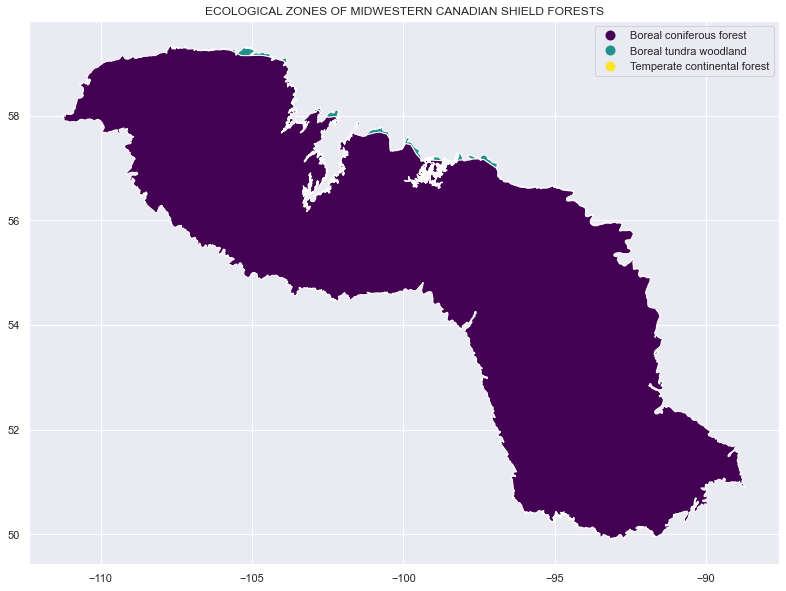

In [26]:
cmap='viridis'
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('ECOLOGICAL ZONES OF MIDWESTERN CANADIAN SHIELD FORESTS')
midwest_shield_ecozone_df.plot(ax=ax,column='gez_name',cmap=cmap,legend=True)
plt.show()

# Holdridge life zones

In [27]:
holdridge= 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/HoldridgeLifeZones.json'
holdridge_df = getdf(holdridge)

In [28]:
holdridge_df.shape

(4831, 11)

In [29]:
holdridge_df.head(2)

,FID,AREA,PERIMETER,HOLDRIG_,HOLDRIG_ID,ZONE,CASE_,FREQUENCY,DESC,SYMBOL,geometry
0,0,240.50,173,2,3695,1,2,13,Ice,5,"POLYGON ((-61.00000 81.00000, -61.50000 81.000..."
1,1,1.25,6,3,110,2,3,232,Polar desert,5,"POLYGON ((-80.50000 83.00000, -81.00000 83.000..."


In [30]:
holdridge_df = holdridge_df[['DESC', 'geometry']]
holdridge_df.head(2)

,DESC,geometry
0,Ice,"POLYGON ((-61.00000 81.00000, -61.50000 81.000..."
1,Polar desert,"POLYGON ((-80.50000 83.00000, -81.00000 83.000..."


In [31]:
midwest_shield_holdrige_df = holdridge_df.clip(midwest_shield)

midwest_shield_holdrige_df.shape

(11, 2)

In [35]:
midwest_shield_holdrige_df

,DESC,geometry
853,Cool temperate moist forest,"POLYGON ((-96.50000 51.50000, -96.50000 52.000..."
699,Boreal wet forest,"POLYGON ((-91.50000 50.00000, -91.50000 50.500..."
903,Boreal wet forest,"POLYGON ((-92.50000 52.00000, -92.00000 52.000..."
904,Cool temperate moist forest,"POLYGON ((-91.50000 52.00000, -91.50000 51.500..."
854,Boreal wet forest,"POLYGON ((-93.00000 53.00000, -93.00000 52.500..."
855,Cool temperate moist forest,"POLYGON ((-92.50000 53.00000, -92.50000 52.500..."
639,,"MULTIPOLYGON (((-103.00000 58.00000, -103.1337..."
177,Boreal moist forest,"MULTIPOLYGON (((-92.00000 54.50000, -92.00000 ..."
595,,"POLYGON ((-109.00000 59.00000, -109.50000 59.0..."
815,,"MULTIPOLYGON (((-97.00000 52.13022, -97.00737 ..."


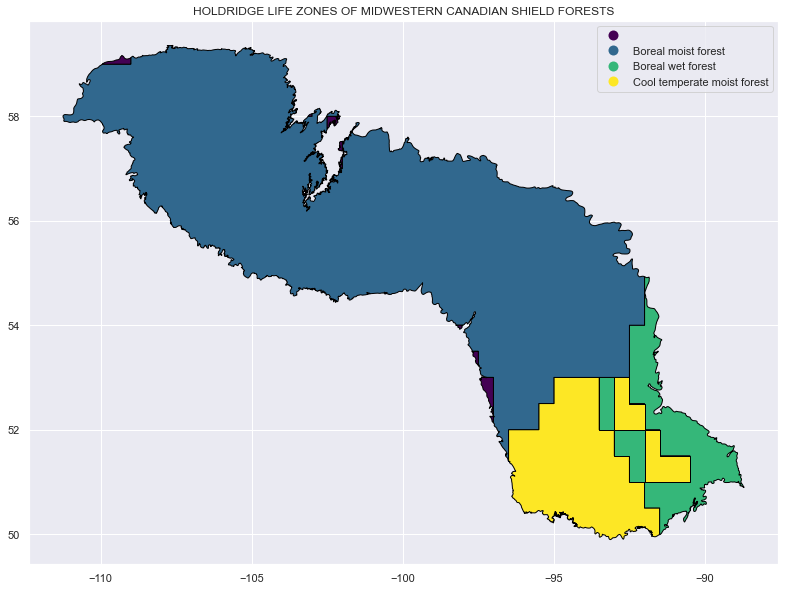

In [34]:
cmap='viridis'
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('HOLDRIDGE LIFE ZONES OF MIDWESTERN CANADIAN SHIELD FORESTS')
midwest_shield_holdrige_df.plot(ax=ax,column='DESC',cmap=cmap,edgecolor='black',legend=True)
plt.show()

# Global Critical Habitat Screening

In [83]:
critical_rst = r'GlobalCriticalHabitatScreening.tif'
critical_img = rst.open(critical_rst)

In [84]:
out_critical, out_transform = mask(critical_img, [geom for geom in midwest_shield.geometry], crop=True, pad=True)
out_meta = critical_img.meta

out_meta.update({"driver": "GTiff",
                 "height": out_critical.shape[1],
                 "width": out_critical.shape[2],
                 "transform": out_transform})

with rst.open(r'critical_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_critical)

In [85]:
forest_critical_rst = r'critical_masked.tiff'
forest_critical_img = rst.open(forest_critical_rst)

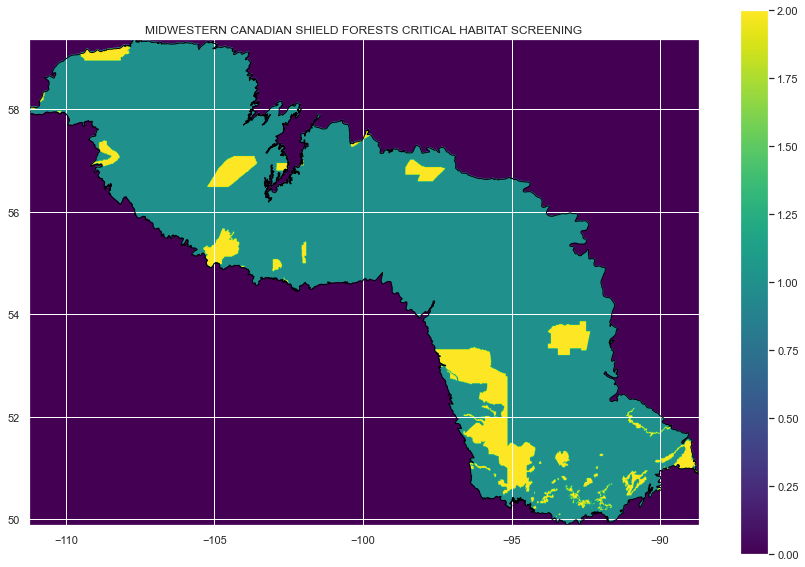

In [87]:
mpl.rc('image', cmap='viridis')

arr = forest_critical_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.set_title('MIDWESTERN CANADIAN SHIELD FORESTS CRITICAL HABITAT SCREENING')
show(arr, transform=forest_critical_img.transform, ax=ax)
midwest_shield.plot(ax=ax, color='none', edgecolor='black')

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

1) protected areas

2) Key Biodiversity Areas

3) threatened ecosystems, 4) critical sites for selected species (tigers and sea turtles), and 5) the distributions of threatened species qualifying under IUCN Red List criterion

#### Biodiversity Hot Spots

In [88]:
biodivers='https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson'
biodivers_df=getdf(biodivers)

In [89]:
biodivers_df.shape

(53, 6)

In [90]:
biodivers_df.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [91]:
midwest_shield_climate_df = biodivers_df.clip(midwest_shield)

midwest_shield_climate_df.shape

(0, 6)

No biodiversity hot spots

# Climate

In [36]:
climate='https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson'
climate_df=getdf(climate)

In [37]:
climate_df.shape

(26165, 2)

In [38]:
climate_df.head(3)

,CLASS_NAME,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."


In [39]:
#remove all CLASS_NAME=0
climate_df=climate_df[climate_df['CLASS_NAME']!=0]

climate_df.shape

(23828, 2)

In [42]:
midwest_shield_climate_df = climate_df.clip(midwest_shield)

midwest_shield_climate_df.shape

(7, 2)

In [43]:
midwest_shield_climate_df.head()

,CLASS_NAME,geometry
5978,8,"POLYGON ((-106.65000 59.25000, -106.70000 59.2..."
8633,7,"MULTIPOLYGON (((-90.90000 50.40000, -91.00000 ..."
7563,7,"POLYGON ((-96.85000 52.15000, -96.85000 52.100..."
7533,8,"POLYGON ((-97.15000 53.10000, -97.15000 52.900..."
6729,3,"POLYGON ((-101.85000 54.60000, -101.65000 54.6..."


In [44]:
classification={'1':'Tropical montane','2':'Tropical wet', 
                '3':'Tropical moist','4':'Tropical dry', 
                '5':'Warm temperate moist','6':'Warm temperate dry',
                '7':'Cool temperate moist','8':'Cool temperate dry',
                '9':'Boreal moist','10':'Boreal dry','11':'Polar moist',
                '12':'Polar dry'}

midwest_shield_climate_df['CLASS_NAME']=climate_df['CLASS_NAME'].astype('str').replace(classification)

midwest_shield_climate_df.head()

,CLASS_NAME,geometry
5978,Cool temperate dry,"POLYGON ((-106.65000 59.25000, -106.70000 59.2..."
8633,Cool temperate moist,"MULTIPOLYGON (((-90.90000 50.40000, -91.00000 ..."
7563,Cool temperate moist,"POLYGON ((-96.85000 52.15000, -96.85000 52.100..."
7533,Cool temperate dry,"POLYGON ((-97.15000 53.10000, -97.15000 52.900..."
6729,Tropical moist,"POLYGON ((-101.85000 54.60000, -101.65000 54.6..."


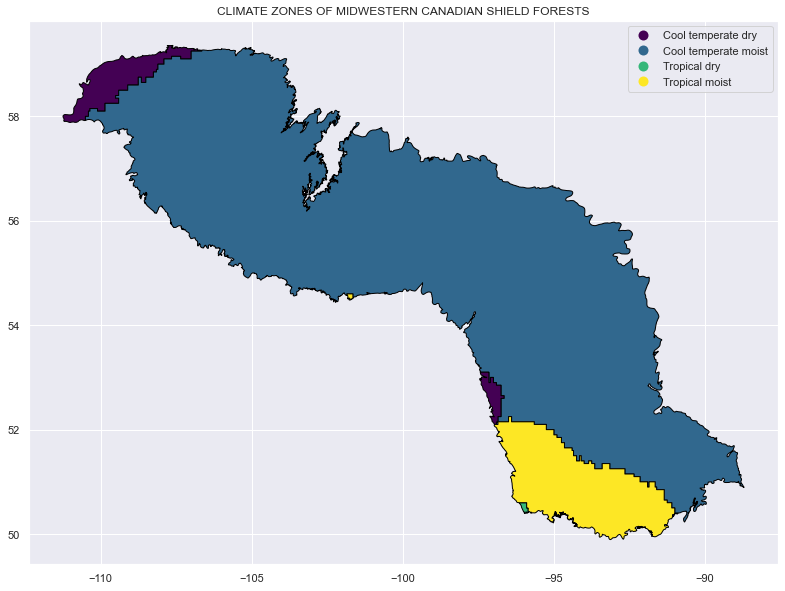

In [45]:
cmap='viridis'
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('CLIMATE ZONES OF MIDWESTERN CANADIAN SHIELD FORESTS')
midwest_shield_climate_df.plot(ax=ax,column='CLASS_NAME',cmap=cmap,edgecolor='black',legend=True)
plt.show()

# Soil

#### Global Agro‐Ecological Zones

In [53]:
agro = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson'
agro_df = getdf(agro)

In [54]:
agro_df.shape

(116675, 2)

In [55]:
agro_df.tail(4)

,Value,geometry
116671,1,"POLYGON ((-67.50000 -55.65000, -67.50000 -55.7..."
116672,2,"POLYGON ((-69.40000 -55.75000, -69.40000 -55.8..."
116673,2,"POLYGON ((-67.65000 -55.40000, -67.65000 -55.5..."
116674,2,"POLYGON ((-66.85000 -55.75000, -66.85000 -55.9..."


In [56]:
midwest_shield_agro_df = agro_df.clip(midwest_shield)

midwest_shield_agro_df.shape

(519, 2)

In [57]:
midwest_shield_agro_df.head(3)

,Value,geometry
37816,18,"MULTIPOLYGON (((-96.35000 51.10000, -96.40000 ..."
36427,14,"POLYGON ((-90.50000 51.25000, -90.50000 51.150..."
36424,14,"POLYGON ((-96.40000 51.15875, -96.40069 51.159..."


In [62]:
values = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}

midwest_shield_agro_df['Value']=agro_df['Value'].astype('str').replace(values)

midwest_shield_agro_df.head()

,Value,geometry
37816,Water,"MULTIPOLYGON (((-96.35000 51.10000, -96.40000 ..."
36427,"Sub-humid, poor soils","POLYGON ((-90.50000 51.25000, -90.50000 51.150..."
36424,"Sub-humid, poor soils","POLYGON ((-96.40000 51.15875, -96.40069 51.159..."
36426,Water,"POLYGON ((-93.15000 51.35000, -93.15000 51.150..."
36216,Water,"POLYGON ((-93.85000 51.35000, -93.85000 51.150..."


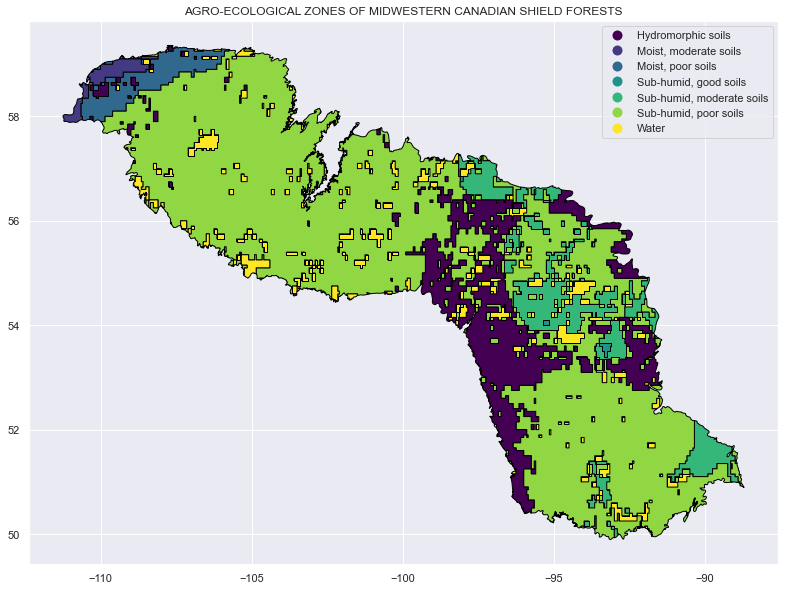

In [64]:
cmap='viridis'
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('AGRO-ECOLOGICAL ZONES OF MIDWESTERN CANADIAN SHIELD FORESTS')
midwest_shield_agro_df.plot(ax=ax,column='Value',cmap=cmap,edgecolor='black',legend=True)
plt.show()

#### Wood Fiber Concessions

In [105]:
woodfiber = 'https://datasets.mojaglobal.workers.dev/0:/LandCover/Forest/Wood_Fiber_Concenssions/Wood_Fiber_Concessions.geojson'
woodfiber_df = getdf(woodfiber)

In [106]:
woodfiber_df.shape

(611, 20)

In [107]:
woodfiber_df.head()

,OBJECTID_1,OBJECTID,group_comp,NAME,type,COUNTRY,area_ha,source,Last_updat,gfwid,Shape_Leng,source_typ,year,FID_,source_t_1,Shape_Le_1,Shape_Le_2,Shape_Length,Shape_Area,geometry
0,1,0,,,Sylvicoles,COG,1520,Varies,2014,97c60dd5-f1bf-49ed-b7af-2290b2632625,0.0,,,0,government,0.217797,0.217797,0.217797,0.001238,"MULTIPOLYGON (((15.39716 -3.99929, 15.38867 -3..."
1,2,0,,,Sylvicoles,COG,90254,Varies,2014,bc610753-cb10-4526-821c-41e1ec48f00e,0.0,,,0,government,1.500103,1.500103,1.500103,0.073564,"POLYGON ((11.92145 -4.48997, 11.90388 -4.51144..."
2,3,0,,,GR,COG,5,Varies,2014,84ea5c10-977f-479b-b5c4-4af3644a6c71,0.0,,,0,government,0.008339,0.008339,0.008339,0.000004,"POLYGON ((15.38620 -4.11279, 15.38581 -4.11189..."
3,4,0,,,Eucalyptus,COG,465,Varies,2014,cc001886-2ac3-45e9-b694-b4713151a156,0.0,,,0,government,0.111767,0.111767,0.111767,0.000378,"POLYGON ((15.36195 -4.10633, 15.35962 -4.10825..."
4,5,0,,,Zone à défricher ATAMA,COG,4334,Varies,2014,5df0b8cb-5106-4366-8ae6-2d0f63a7fd2d,0.0,,,0,government,0.280895,0.280895,0.280895,0.003521,"POLYGON ((15.44217 0.38419, 15.45878 0.45575, ..."


In [108]:
midwest_shield_woodfiber_df = woodfiber_df.clip(midwest_shield)

midwest_shield_woodfiber_df.shape

(0, 20)

None

#### Managed Forest Concessions

In [100]:
managed_df = gpd.read_file("ManagedForestConcessions_CAN.geojson")

In [101]:
managed_df.shape

(14064, 17)

In [110]:
managed_df.head(4)

,id,OBJECTID,country,name,company,group_comp,group_coun,legal_term,status,province,source,last_updat,Shape_Leng,AREA_GEO,Shape_Length,Shape_Area,geometry
0,1,1,CAN,Pasquia-Porcupine,Edgewood Forest Products Ltd. / Weyerhaeuser C...,,,Forest Management Agreement,,Saskatchewan,"Global Witness, 2014",2014,0.189137,6.368463e+06,0.189137,0.000849,"POLYGON ((-101.67174 52.86647, -101.67174 52.8..."
1,2,2,CAN,Mee-Toos Forest Products Ltd.,Mee-Toos Forest Products Ltd. / Peter Ballanty...,,,Timber Supply License,,Saskatchewan,"Global Witness, 2014",2014,19.330483,1.577932e+10,19.165368,2.208903,"POLYGON ((-103.27271 55.51302, -103.27362 55.5..."
2,3,3,CAN,FML-2,Tolko,,,Forest Management License,,Manitoba,"Global Witness, 2014",2014,24.580431,8.781664e+10,24.575797,12.308071,"POLYGON ((-99.51665 56.33318, -99.67474 56.333..."
3,4,4,CAN,Crossroute Forest,Abitibi-Consolidated Company of Canada,,,Forest Management Unit,,Ontario,"Global Witness, 2014",2014,0.020780,3.104296e+04,0.020780,0.000004,"POLYGON ((-91.97028 48.24774, -91.97014 48.247..."


In [103]:
midwest_shield_managed_df = managed_df.clip(midwest_shield)

midwest_shield_managed_df.shape

(63, 17)

In [109]:
midwest_shield_managed_df.head(2)

,id,OBJECTID,country,name,company,group_comp,group_coun,legal_term,status,province,source,last_updat,Shape_Leng,AREA_GEO,Shape_Length,Shape_Area,geometry
2,3,3,CAN,FML-2,Tolko,,,Forest Management License,,Manitoba,"Global Witness, 2014",2014,24.580431,8.781664e+10,24.575797,12.308071,"MULTIPOLYGON (((-101.84677 54.58784, -101.8467..."
13995,15468,15468,CAN,Kitsaki-Zelensky,Zelensky Bros.,,,Timber Supply License,,Saskatchewan,"Global Witness, 2014",2014,5.970580,2.626025e+09,5.968120,0.368188,"POLYGON ((-103.99930 54.92401, -103.99690 54.9..."


In [112]:
midwest_shield_managed_shape=midwest_shield_managed_df[['id','name','company','legal_term','status','province','source','AREA_GEO','geometry']]

In [113]:
midwest_shield_managed_shape.to_file("midwest_shield_managed_shape.shp")

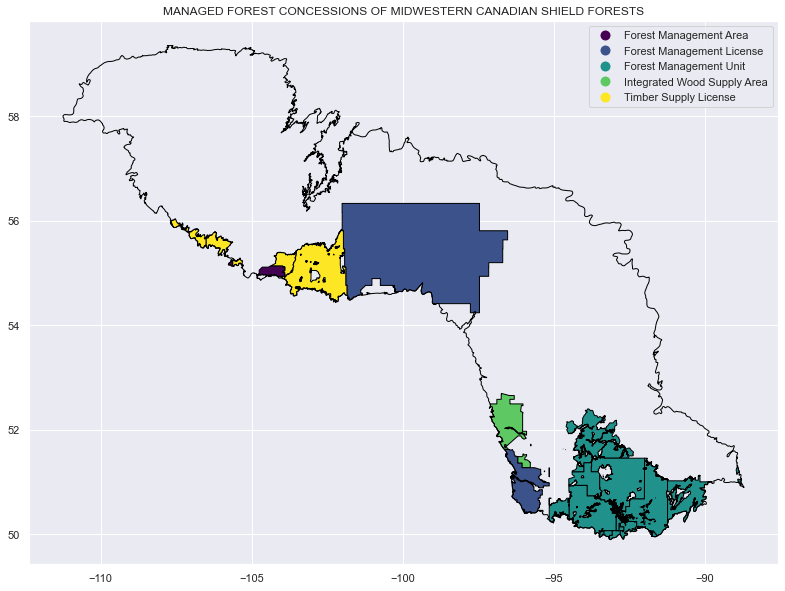

In [115]:
cmap='viridis'
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('MANAGED FOREST CONCESSIONS OF MIDWESTERN CANADIAN SHIELD FORESTS')
midwest_shield_managed_df.plot(ax=ax,column='legal_term',cmap=cmap,edgecolor='black',legend=True)
midwest_shield.plot(ax=ax, color='none', edgecolor='black')
plt.show()

#### Rooting Conditions

In [92]:
root_rst = r'SoilResources_RootingConditions_GAEZ.tif'
root_img = rst.open(root_rst)

In [93]:
out_root, out_transform = mask(root_img, [geom for geom in midwest_shield.geometry], crop=True, pad=True)
out_meta = root_img.meta

out_meta.update({"driver": "GTiff",
                 "height": out_root.shape[1],
                 "width": out_root.shape[2],
                 "transform": out_transform})

with rst.open(r'root_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_root)

In [94]:
forest_root_rst = r'root_masked.tiff'
forest_root_img = rst.open(forest_root_rst)

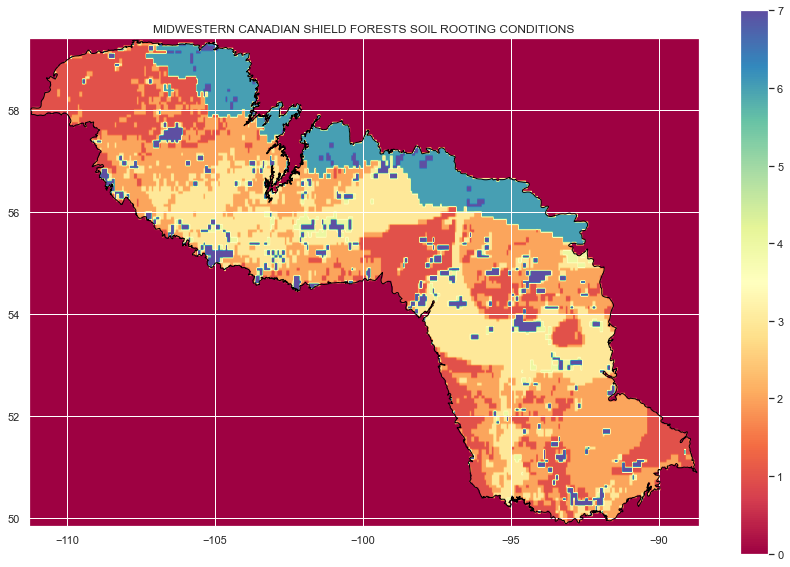

In [95]:
mpl.rc('image', cmap='Spectral')

arr = forest_root_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.set_title('MIDWESTERN CANADIAN SHIELD FORESTS SOIL ROOTING CONDITIONS')
show(arr, transform=forest_root_img.transform, ax=ax)
midwest_shield.plot(ax=ax, color='none', edgecolor='black')

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

1: No or slight limitations

2: Moderate limitations · 3: Sever limitations · 4: Very severe limitations

5: Mainly non-soil · 6: Permafrost area · 7: Water bodies

#### Soil resources

In [46]:
soil = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson'
soil_df = getdf(soil)

In [47]:
soil_df.shape

(33, 3)

In [48]:
soil_df.head()

,SNAME,IPCC,geometry
0,AB,Albeluvisol,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49..."
1,AC,Acrisol,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ..."
2,AN,Andosol,"MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ..."
3,AR,Arenosol,"MULTIPOLYGON (((60.36591 43.61313, 60.33553 43..."
4,AT,Anthrosol,"MULTIPOLYGON (((122.11467 30.15301, 121.90077 ..."


In [49]:
soil_df = soil_df[['IPCC', 'geometry']]
soil_df.head()

,IPCC,geometry
0,Albeluvisol,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49..."
1,Acrisol,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ..."
2,Andosol,"MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ..."
3,Arenosol,"MULTIPOLYGON (((60.36591 43.61313, 60.33553 43..."
4,Anthrosol,"MULTIPOLYGON (((122.11467 30.15301, 121.90077 ..."


In [50]:
midwest_shield_soil_df = soil_df.clip(midwest_shield)

midwest_shield_soil_df.shape

(5, 2)

In [51]:
midwest_shield_soil_df.head()

,IPCC,geometry
0,Albeluvisol,"MULTIPOLYGON (((-91.72604 53.52295, -91.82536 ..."
32,Waterbodies,"MULTIPOLYGON (((-98.22836 57.26939, -98.24603 ..."
16,HAC,"POLYGON ((-92.04076 54.81390, -92.24514 54.821..."
8,Cambisol,"MULTIPOLYGON (((-98.20914 54.05054, -98.16573 ..."
17,Histosol,"POLYGON ((-99.47384 54.83887, -99.46226 55.084..."


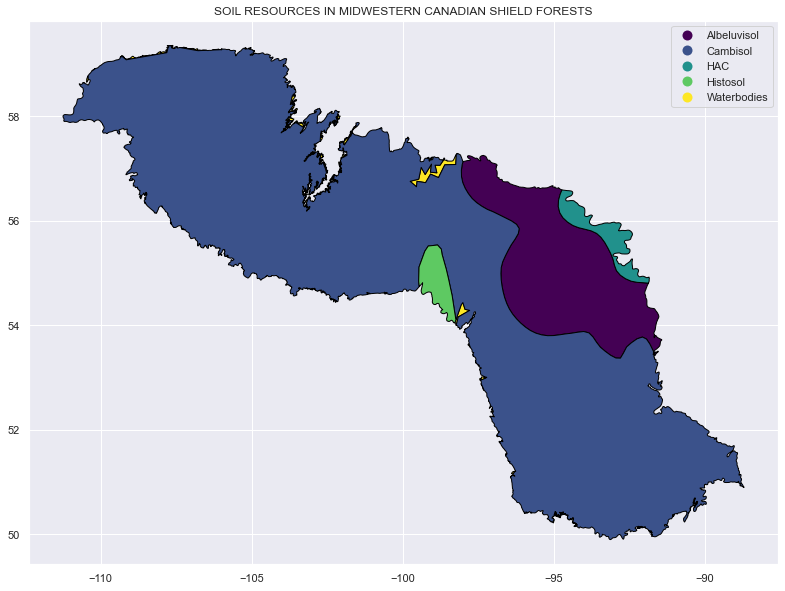

In [52]:
cmap='viridis'
fig,ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('SOIL RESOURCES IN MIDWESTERN CANADIAN SHIELD FORESTS')
midwest_shield_soil_df.plot(ax=ax,column='IPCC',cmap=cmap,edgecolor='black',legend=True)
plt.show()

# Carbon

#### Soil Organic Carbon Density

In [65]:
carbon_dens_rst = r'https://datasets.mojaglobal.workers.dev/0:/Soil/GlobalSoilOrganicCarbonDensityinkgCm_1mDepth.tif'
carbon_dens_img = rst.open(carbon_dens_rst)

Text(0.5, 1.0, 'SOIL ORGANIC CARBON DENSITY FREQUENCY IN THE WORLD')

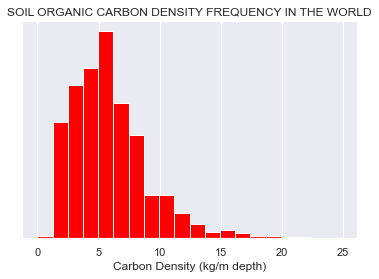

In [66]:
fig, axhist = plt.subplots(1, 1)
show_hist(carbon_dens_img,bins=20,ax=axhist)
axhist.get_legend().remove()
axhist.axes.get_yaxis().set_visible(False)
axhist.set_xlabel('Carbon Density (kg/m depth)')
axhist.set_title('SOIL ORGANIC CARBON DENSITY FREQUENCY IN THE WORLD')

In [67]:
out_carbon_dens, out_transform = mask(carbon_dens_img, [geom for geom in midwest_shield.geometry], crop=True, pad=True)
out_meta = carbon_dens_img.meta

out_meta.update({"driver": "GTiff",
                 "height": out_carbon_dens.shape[1],
                 "width": out_carbon_dens.shape[2],
                 "transform": out_transform})

with rst.open(r'carbon_dens_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_carbon_dens)

In [68]:
forest_carbon_dens_rst = r'carbon_dens_masked.tiff'
forest_carbon_dens_img = rst.open(forest_carbon_dens_rst)

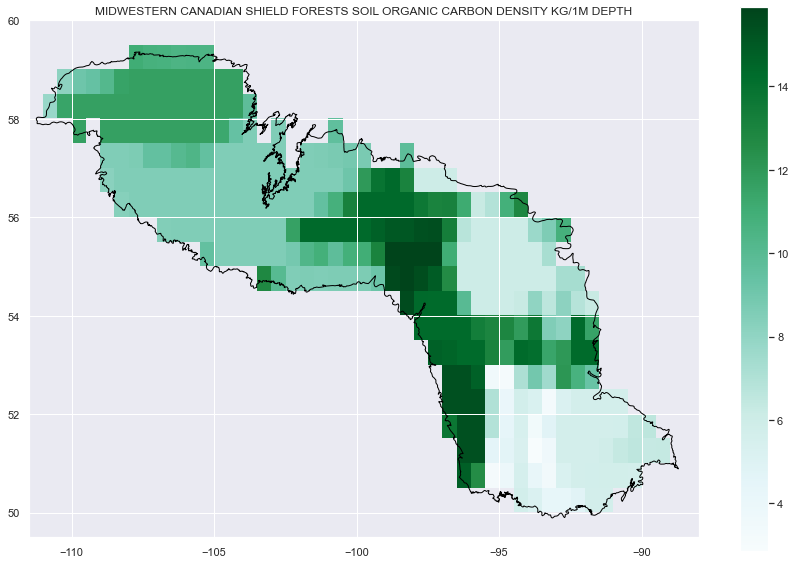

In [71]:
mpl.rc('image', cmap='BuGn')

arr = forest_carbon_dens_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.set_title('MIDWESTERN CANADIAN SHIELD FORESTS SOIL ORGANIC CARBON DENSITY KG/1M DEPTH')
show(arr, transform=forest_carbon_dens_img.transform, ax=ax)
midwest_shield.plot(ax=ax, color='none', edgecolor='black')

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

#### Geocarbon above Ground Mass

In [72]:
geocarbon_rst = r'GEOCARBON_AGB_Map180.tif'
geocarbon_img = rst.open(geocarbon_rst)

In [73]:
out_geocarbon, out_transform = mask(geocarbon_img, [geom for geom in midwest_shield.geometry], crop=True, pad=True)
out_meta = geocarbon_img.meta

out_meta.update({"driver": "GTiff",
                 "height": out_geocarbon.shape[1],
                 "width": out_geocarbon.shape[2],
                 "transform": out_transform})

with rst.open(r'geocarbon_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_geocarbon)

In [74]:
forest_geocarbon_rst = r'geocarbon_masked.tiff'
forest_geocarbon_img = rst.open(forest_geocarbon_rst)

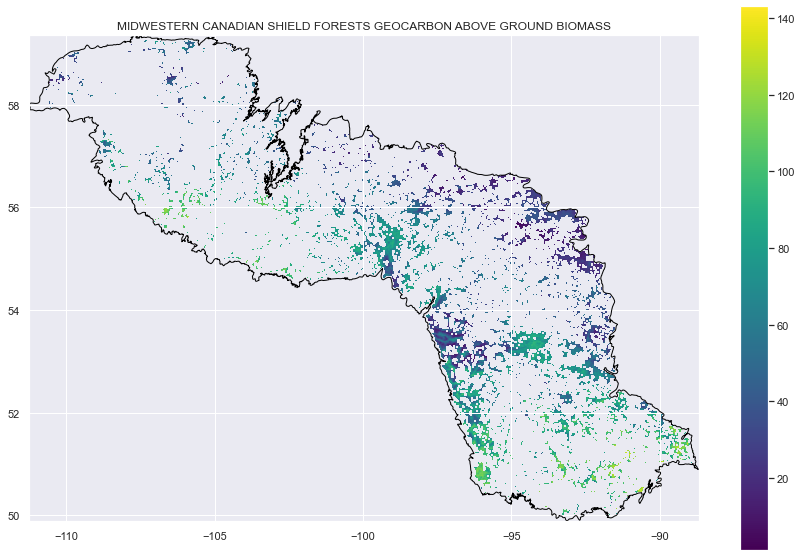

In [81]:
mpl.rc('image', cmap='viridis')

arr = forest_geocarbon_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.set_title('MIDWESTERN CANADIAN SHIELD FORESTS GEOCARBON ABOVE GROUND BIOMASS')
show(arr, transform=forest_geocarbon_img.transform, ax=ax)
midwest_shield.plot(ax=ax, color='none', edgecolor='black')

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

#### Soil Organic Carbon

In [76]:
gsoc_rst = r'GlocalSoilOC_GSOCmap1.5.0.tif'
gsoc_img = rst.open(gsoc_rst)

In [77]:
out_gsoc, out_transform = mask(gsoc_img, [geom for geom in midwest_shield.geometry], crop=True, pad=True)
out_meta = gsoc_img.meta

out_meta.update({"driver": "GTiff",
                 "height": out_gsoc.shape[1],
                 "width": out_gsoc.shape[2],
                 "transform": out_transform})

with rst.open(r'gsoc_masked.tiff', 'w', **out_meta) as dest:
    dest.write(out_gsoc)

In [78]:
forest_gsoc_rst = r'gsoc_masked.tiff'
forest_gsoc_img = rst.open(forest_gsoc_rst)

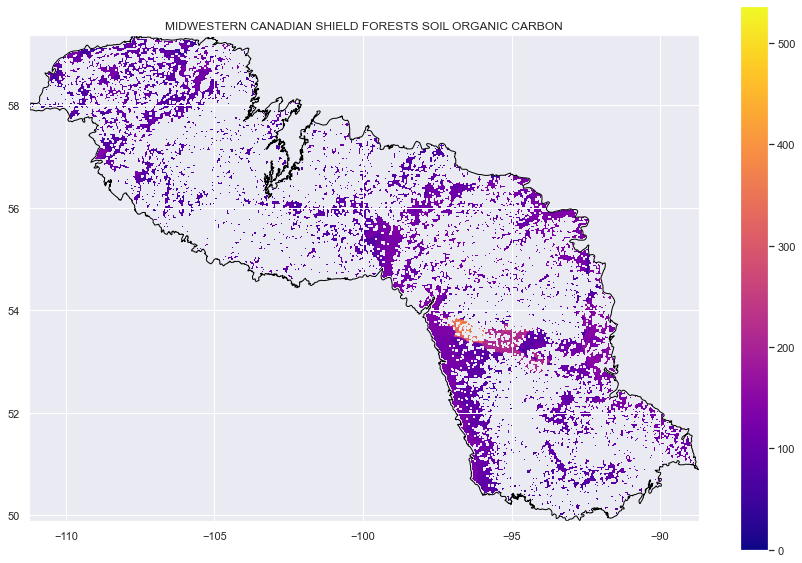

In [82]:
mpl.rc('image', cmap='plasma')

arr = forest_gsoc_img.read(1)
arr = np.where(arr < -10, np.nan, arr)

fig, ax = plt.subplots(1, 1, figsize=(15,10))

ax.set_title('MIDWESTERN CANADIAN SHIELD FORESTS SOIL ORGANIC CARBON')
show(arr, transform=forest_gsoc_img.transform, ax=ax)
midwest_shield.plot(ax=ax, color='none', edgecolor='black')

fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.nanmin(arr), vmax=np.nanmax(arr))), ax=ax)

plt.show()

# Köppen-Geiger climate shift

In [116]:
shift_25 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1901-1925.geojson"
shift_25_df = getdf(shift_25)
shift_50 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1926-1950.geojson"
shift_50_df = getdf(shift_50)
shift_75 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1951-1975.geojson"
shift_75_df = getdf(shift_75)
shift_00 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/1976-2000.geojson"
shift_00_df = getdf(shift_00)

shift_A125 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-A1FI.geojson"
shift_A125_df = getdf(shift_A125)
shift_A150 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-A1FI.geojson"
shift_A150_df = getdf(shift_A150)
shift_A175 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-A1FI.geojson"
shift_A175_df = getdf(shift_A175)
shift_A100 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-A1FI.geojson"
shift_A100_df = getdf(shift_A100)

shift_A225 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-A2.geojson"
shift_A225_df = getdf(shift_A225)
shift_A250 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-A2.geojson"
shift_A250_df = getdf(shift_A250)
shift_A275 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-A2.geojson"
shift_A275_df = getdf(shift_A275)
shift_A200 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-A2.geojson"
shift_A200_df = getdf(shift_A200)

shift_B125 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-B1.geojson"
shift_B125_df = getdf(shift_B125)
shift_B150 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-B1.geojson"
shift_B150_df = getdf(shift_B150)
shift_B175 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-B1.geojson"
shift_B175_df = getdf(shift_B175)
shift_B100 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-B1.geojson"
shift_B100_df = getdf(shift_B100)

shift_B225 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2001-2025-B2.geojson"
shift_B225_df = getdf(shift_B225)
shift_B250 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2026-2050-B2.geojson"
shift_B250_df = getdf(shift_B250)
shift_B275 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2051-2075-B2.geojson"
shift_B275_df = getdf(shift_B275)
shift_B200 = "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/2076-2100-B2.geojson"
shift_B200_df = getdf(shift_B200)

In [117]:
shift_25_df.shape

(2319, 6)

In [118]:
shift_25_df.head(3)

,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area,geometry
0,1,1,62,2.0,0.25,"POLYGON ((-37.50000 83.50000, -37.50000 84.000..."
1,2,2,62,16.0,3.75,"POLYGON ((-29.50000 83.50000, -29.50000 84.000..."
2,3,3,62,5.0,1.00,"POLYGON ((-46.00000 83.00000, -44.00000 83.000..."


In [119]:
midwest_shield_koppen_25_df = shift_25_df.clip(midwest_shield)
midwest_shield_koppen_50_df = shift_50_df.clip(midwest_shield)
midwest_shield_koppen_75_df = shift_75_df.clip(midwest_shield)
midwest_shield_koppen_00_df = shift_00_df.clip(midwest_shield)

midwest_shield_A125_df = shift_A125_df.clip(midwest_shield)
midwest_shield_A150_df = shift_A150_df.clip(midwest_shield)
midwest_shield_A175_df = shift_A175_df.clip(midwest_shield)
midwest_shield_A100_df = shift_A100_df.clip(midwest_shield)

midwest_shield_A225_df = shift_A225_df.clip(midwest_shield)
midwest_shield_A250_df = shift_A250_df.clip(midwest_shield)
midwest_shield_A275_df = shift_A275_df.clip(midwest_shield)
midwest_shield_A200_df = shift_A200_df.clip(midwest_shield)

midwest_shield_B125_df = shift_B125_df.clip(midwest_shield)
midwest_shield_B150_df = shift_B150_df.clip(midwest_shield)
midwest_shield_B175_df = shift_B175_df.clip(midwest_shield)
midwest_shield_B100_df = shift_B100_df.clip(midwest_shield)

midwest_shield_B225_df = shift_B225_df.clip(midwest_shield)
midwest_shield_B250_df = shift_B250_df.clip(midwest_shield)
midwest_shield_B275_df = shift_B275_df.clip(midwest_shield)
midwest_shield_B200_df = shift_B200_df.clip(midwest_shield)

In [133]:
koppen = {'11': 'Tropical rainforest climate', '12': 'Tropical monsoon climate', 
              '13': 'Tropical savanna climate with dry-summer characteristics', 
              '14': 'Tropical savanna climate with dry-winter characteristics', 
              '21': 'Cold desert climate', '22': 'Hot desert climate', '26': 'Cold semi-arid climate',
              '26.0': 'Cold semi-arid climate',
              '27': 'Hot semi-arid climate ', '31': 'Humid subtropical climate', 
              '32': 'Temperate oceanic climate', '33': 'Subpolar oceanic climate ', 
              '34': 'Hot-summer Mediterranean climate ', '35': 'Warm-summer Mediterranean climate ',
              '36': 'Cold-summer Mediterranean climate ', 
              '37': 'Monsoon-influenced humid subtropical climate ', 
              '38': 'Subtropical highland climate ', '39': 'Cold subtropical highland climate ', 
              '41': 'Hot-summer humid continental climate ', 
              '42': 'Warm-summer humid continental climate ', 
          '42.0': 'Warm-summer humid continental climate ',
          '43': 'Subarctic climate ',
              '43.0': 'Subarctic climate ',
              '44': 'Extremely cold subarctic climate ', 
              '45': 'Mediterranean-influenced hot-summer humid continental climate ', 
              '46': 'Mediterranean-influenced warm-summer humid continental climate ', 
              '47': 'Mediterranean-influenced subarctic climate', 
              '47.0': 'Mediterranean-influenced subarctic climate',
              '48': 'Mediterranean-influenced extremely cold subarctic climate ', 
              '49': 'Monsoon-influenced hot-summer humid continental climate ', 
              '50': 'Monsoon-influenced warm-summer humid continental climate ', 
              '51': 'Monsoon-influenced subarctic climate ', 
              '51.0': 'Monsoon-influenced subarctic climate ',
              '52': 'Monsoon-influenced extremely cold subarctic climate ', 
              '61': 'Ice cap climate ', '62': 'Tundra climate ', 
              '62.0': 'Tundra climate ',
              '0': 'NaN'}

midwest_shield_koppen_25_df['GRIDCODE']=shift_25_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_koppen_50_df['GRIDCODE']=shift_50_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_koppen_75_df['GRIDCODE']=shift_75_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_koppen_00_df['GRIDCODE']=shift_00_df['GRIDCODE'].astype('str').replace(koppen)

midwest_shield_A125_df['GRIDCODE'] = shift_A125_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_A150_df['GRIDCODE'] = shift_A150_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_A175_df['GRIDCODE'] = shift_A175_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_A100_df['GRIDCODE'] = shift_A100_df['GRIDCODE'].astype('str').replace(koppen)

midwest_shield_A225_df['GRIDCODE'] = shift_A225_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_A250_df['GRIDCODE'] = shift_A250_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_A275_df['GRIDCODE'] = shift_A275_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_A200_df['GRIDCODE'] = shift_A200_df['GRIDCODE'].astype('str').replace(koppen)

midwest_shield_B125_df['GRIDCODE'] = shift_B125_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_B150_df['GRIDCODE'] = shift_B150_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_B175_df['GRIDCODE'] = shift_B175_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_B100_df['GRIDCODE'] = shift_B100_df['GRIDCODE'].astype('str').replace(koppen)

midwest_shield_B225_df['GRIDCODE'] = shift_B225_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_B250_df['GRIDCODE'] = shift_B250_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_B275_df['GRIDCODE'] = shift_B275_df['GRIDCODE'].astype('str').replace(koppen)
midwest_shield_B200_df['GRIDCODE'] = shift_B200_df['GRIDCODE'].astype('str').replace(koppen)


#### Historical data

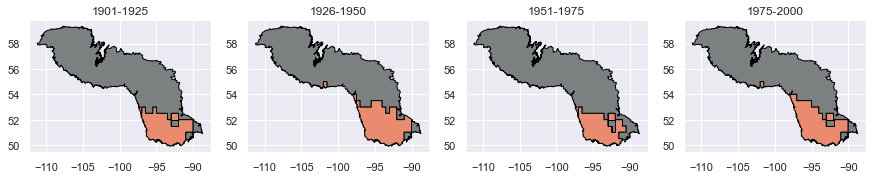

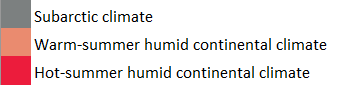

In [152]:
cmap=colors.LinearSegmentedColormap.from_list("",["#7C8080","#EA8B6F"])
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,10))
ax1.set_title('1901-1925')
ax2.set_title('1926-1950')
ax3.set_title('1951-1975')
ax4.set_title('1975-2000')

midwest_shield_koppen_25_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap,edgecolor='black')
midwest_shield_koppen_50_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap,edgecolor='black')
midwest_shield_koppen_75_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap,edgecolor='black')
midwest_shield_koppen_00_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap,edgecolor='black')

plt.show()

from IPython.display import Image
Image(filename='legend_mw.png') 

#### Projection/Scenario analysis

In [124]:
df_scenario=pd.read_csv("scenarios.csv")
pd.set_option('display.max_colwidth', None)
df_scenario

,Scenario/Factor,Globalization,Economy,Population,Technology
0,A1F1,-,rapid growth,low growth,"rapid introduction, efficient"
1,A2,heterogeneous,less concern,high growth,-
2,B1,convergent,tertiary,-,"clean, resource-efficient"
3,B2,local,-,-,"less rapid growth, environmental sustainability focus"


#### A1F1

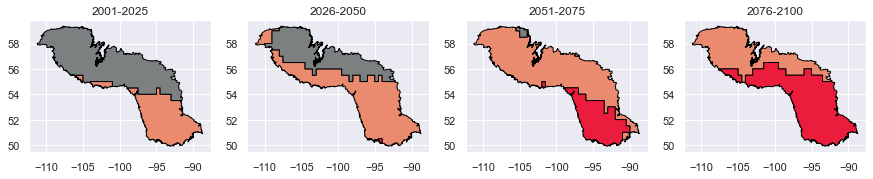

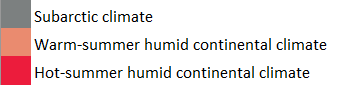

In [153]:
cmap1=colors.LinearSegmentedColormap.from_list("",["#7C8080","#EA8B6F"])
cmap2=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#7C8080","#EA8B6F"])
cmap3=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#7C8080","#EA8B6F"])
cmap4=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#EA8B6F"])

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,10))
ax1.set_title('2001-2025')
ax2.set_title('2026-2050')
ax3.set_title('2051-2075')
ax4.set_title('2076-2100')

midwest_shield_A125_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap1,edgecolor='black')
midwest_shield_A150_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap2,edgecolor='black')
midwest_shield_A175_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap3,edgecolor='black')
midwest_shield_A100_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap4,edgecolor='black')

plt.show()

from IPython.display import Image
Image(filename='legend_mw.png') 

#### A2

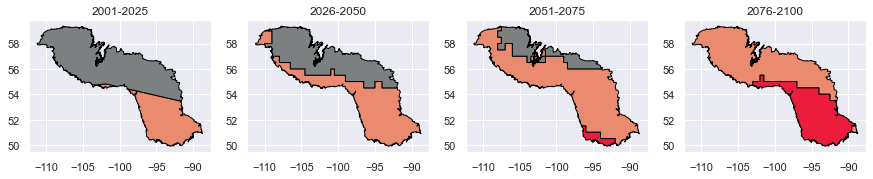

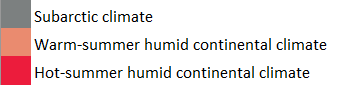

In [154]:
cmap1=colors.LinearSegmentedColormap.from_list("",["#7C8080","#EA8B6F"])
cmap2=colors.LinearSegmentedColormap.from_list("",["#7C8080","#EA8B6F"])
cmap3=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#7C8080","#EA8B6F"])
cmap4=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#EA8B6F"])

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,10))
ax1.set_title('2001-2025')
ax2.set_title('2026-2050')
ax3.set_title('2051-2075')
ax4.set_title('2076-2100')

midwest_shield_A225_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap1,edgecolor='black')
midwest_shield_A250_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap2,edgecolor='black')
midwest_shield_A275_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap3,edgecolor='black')
midwest_shield_A200_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap4,edgecolor='black')
plt.show()

from IPython.display import Image
Image(filename='legend_mw.png') 

#### B1

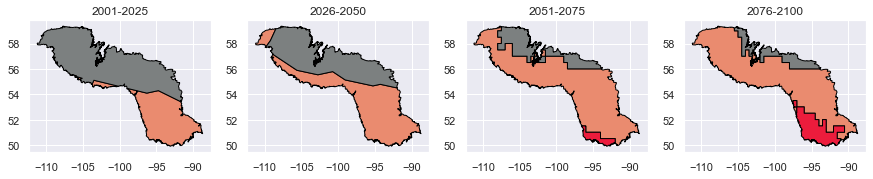

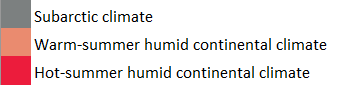

In [155]:
cmap1=colors.LinearSegmentedColormap.from_list("",["#7C8080","#EA8B6F"])
cmap2=colors.LinearSegmentedColormap.from_list("",["#7C8080","#EA8B6F"])
cmap3=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#7C8080","#EA8B6F"])
cmap4=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#7C8080","#EA8B6F"])

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,10))
ax1.set_title('2001-2025')
ax2.set_title('2026-2050')
ax3.set_title('2051-2075')
ax4.set_title('2076-2100')

midwest_shield_B125_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap1,edgecolor='black')
midwest_shield_B150_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap2,edgecolor='black')
midwest_shield_B175_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap3,edgecolor='black')
midwest_shield_B100_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap4,edgecolor='black')
plt.show()

from IPython.display import Image
Image(filename='legend_mw.png') 

#### B2

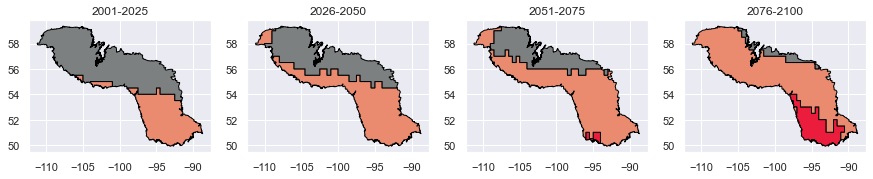

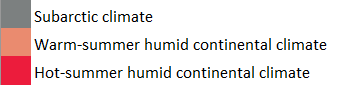

In [156]:
cmap1=colors.LinearSegmentedColormap.from_list("",["#7C8080","#EA8B6F"])
cmap2=colors.LinearSegmentedColormap.from_list("",["#7C8080","#EA8B6F"])
cmap3=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#7C8080","#EA8B6F"])
cmap4=colors.LinearSegmentedColormap.from_list("",["#EC1C3C","#7C8080","#EA8B6F"])

fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,10))
ax1.set_title('2001-2025')
ax2.set_title('2026-2050')
ax3.set_title('2051-2075')
ax4.set_title('2076-2100')

midwest_shield_B225_df.plot(ax=ax1,column='GRIDCODE',cmap=cmap1,edgecolor='black')
midwest_shield_B250_df.plot(ax=ax2,column='GRIDCODE',cmap=cmap2,edgecolor='black')
midwest_shield_B275_df.plot(ax=ax3,column='GRIDCODE',cmap=cmap3,edgecolor='black')
midwest_shield_B200_df.plot(ax=ax4,column='GRIDCODE',cmap=cmap4,edgecolor='black')
plt.show()

from IPython.display import Image
Image(filename='legend_mw.png') 